# [DataSet Pais / Felicidade ](https://www.kaggle.com/unsdsn/world-happiness#2016.csv)

# Python Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier


pd.set_option('display.max_columns', 100)



# Tabela

In [14]:
happy15 = pd.read_csv('/home/rui/Área de Trabalho/DataSets/ds2016.csv', sep = ',')
print("\n Ano de 2015")
display(happy15.head(n =5))
happy16 = pd.read_csv('/home/rui/Área de Trabalho/DataSets/ds2016.csv', sep = ',')
print("\n \n Ano de 2016")
display(happy16.head(n =5))
happy17 = pd.read_csv('/home/rui/Área de Trabalho/DataSets/ds2017.csv', sep = ',')
print("\n \n Ano de 2017")
display(happy17.head(n =5))


 Ano de 2015


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596



 
 Ano de 2016


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596



 
 Ano de 2017


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


# Leitura de Dados

In [15]:
print(happy15.shape)
print(happy16.shape)
print(happy17.shape)
print("")
print("__________________________2015___________________________")
happy15.info()
print("")
print("__________________________2016___________________________")
happy16.info()
print("")
print("__________________________2017___________________________")
happy17.info()

(157, 13)
(157, 13)
(155, 12)

__________________________2015___________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
Country                          157 non-null object
Region                           157 non-null object
Happiness Rank                   157 non-null int64
Happiness Score                  157 non-null float64
Lower Confidence Interval        157 non-null float64
Upper Confidence Interval        157 non-null float64
Economy (GDP per Capita)         157 non-null float64
Family                           157 non-null float64
Health (Life Expectancy)         157 non-null float64
Freedom                          157 non-null float64
Trust (Government Corruption)    157 non-null float64
Generosity                       157 non-null float64
Dystopia Residual                157 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 16.1+ KB

__________________________2016_____________

In [33]:
happy17=happy17.rename(columns={"Happiness.Rank":"Happiness Rank", "Happiness.Score":"Happiness Score",
                                "Economy..GDP.per.Capita.":"Economy (GDP per Capita)",
                                "Health..Life.Expectancy.":"Health (Life Expectancy)", 
                                "Trust..Government.Corruption.":"Trust (Government Corruption)", "Dystopia.Residual":"Dystopia Residual"
                               })
happy_c = pd.concat([happy15, happy16,happy17], axis=0)
happy_c.drop({'Whisker.low', 'Whisker.high', 'Upper Confidence Interval', 'Lower Confidence Interval'}, inplace=True, axis=1)
display(happy_c)


/home/rui/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Country,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Region,Trust (Government Corruption)
0,Denmark,2.739390,1.441780,1.163740,0.579410,0.361710,1,7.526,0.795040,Western Europe,0.444530
1,Switzerland,2.694630,1.527330,1.145240,0.585570,0.280830,2,7.509,0.863030,Western Europe,0.412030
2,Iceland,2.831370,1.426660,1.183260,0.566240,0.476780,3,7.501,0.867330,Western Europe,0.149750
3,Norway,2.664650,1.577440,1.126900,0.596090,0.378950,4,7.498,0.795790,Western Europe,0.357760
4,Finland,2.825960,1.405980,1.134640,0.571040,0.254920,5,7.413,0.810910,Western Europe,0.410040
...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,0.540061,0.368746,0.945707,0.581844,0.252756,151,3.471,0.326425,NaN,0.455220
151,Syria,1.061574,0.777153,0.396103,0.081539,0.493664,152,3.462,0.500533,NaN,0.151347
152,Tanzania,0.621130,0.511136,1.041990,0.390018,0.354256,153,3.349,0.364509,NaN,0.066035
153,Burundi,1.683024,0.091623,0.629794,0.059901,0.204435,154,2.905,0.151611,NaN,0.084148


In [34]:
data = []
for f in happy_c.columns:
    # Defining the role
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
         
    # Defining the level
    if 'Country' in f or f == 'target':
        level = 'binary'
    elif 'ID' in f or f == 'id':
        level = 'nominal'
    elif happy_c[f].dtype == float:
        level = 'interval'
    elif happy_c[f].dtype == int:
        level = 'ordinal'
        
    # Initialize keep to True for all variables except for id
    keep = True
    if f == 'id':
        keep = False
    
    # Defining the data type 
    dtype = happy_c[f].dtype
    
    # Creating a Dict that contains all the metadata for the variable
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)
print(meta)

                                role     level  keep    dtype
varname                                                      
Country                        input    binary  True   object
Dystopia Residual              input  interval  True  float64
Economy (GDP per Capita)       input  interval  True  float64
Family                         input  interval  True  float64
Freedom                        input  interval  True  float64
Generosity                     input  interval  True  float64
Happiness Rank                 input   ordinal  True    int64
Happiness Score                input  interval  True  float64
Health (Life Expectancy)       input  interval  True  float64
Region                         input  interval  True   object
Trust (Government Corruption)  input  interval  True  float64


In [35]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
happy_c[v].describe()

,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Score,Health (Life Expectancy),Trust (Government Corruption)
count,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000
mean,2.168636,0.964072,0.924256,0.383484,0.244039,5.372876,0.555544,0.132830
std,0.573084,0.414688,0.330486,0.147767,0.133823,1.135876,0.231453,0.108014
min,0.377914,0.000000,0.000000,0.000000,0.000000,2.693000,0.000000,0.000000
25%,1.819850,0.667225,0.721940,0.276680,0.154570,4.440000,0.375223,0.059740
50%,2.159880,1.027870,0.943970,0.405760,0.225670,5.303000,0.604590,0.098583
75%,2.546500,1.291788,1.134640,0.495530,0.314720,6.239000,0.729930,0.172330
max,3.837720,1.870766,1.610574,0.658249,0.838075,7.537000,0.952770,0.505210


In [36]:
v = meta[(meta.level == 'binary') & (meta.keep)].index
happy_c[v].describe()

,Country
count,469
unique,162
top,Bhutan
freq,3


In [37]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
happy_c[v].describe()

,Happiness Rank
count,469.000000
mean,78.656716
std,45.181584
min,1.000000
25%,40.000000
50%,79.000000
75%,118.000000
max,157.000000


In [58]:
media = (happy_c["Happiness Score"].median() * 1.10)

happy_c["Happiness Score new"] = np.select(
    [
        happy_c["Happiness Score"] >= 6.4,
        happy_c["Happiness Score"] <= 6.4
    ],
    [
        1,
        0
    ]
)

Text(0.5, 1.0, 'Histograma de Paises / Felicidade')

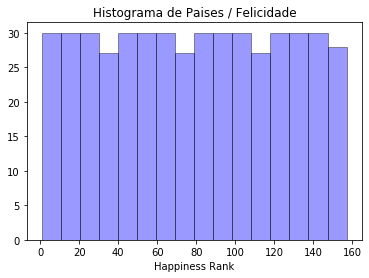

In [38]:
sns.distplot(happy_c['Happiness Rank'], hist=True, kde=False, 
             bins = int(160/10), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Histograma de Paises / Felicidade')
# plt.xlabel('Felicidade')
# plt.ylabel('Paises')

Text(0.5, 1.0, 'Histograma de Paises / Felicidade')

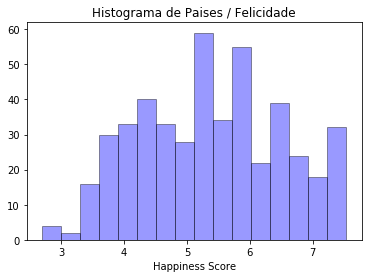

In [39]:
sns.distplot(happy_c['Happiness Score'], hist=True, kde=False, 
             bins = int(160/10), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Histograma de Paises / Felicidade')
# plt.xlabel('')
# plt.ylabel('')

Text(0.5, 1.0, 'Histograma de Paises / Felicidade')

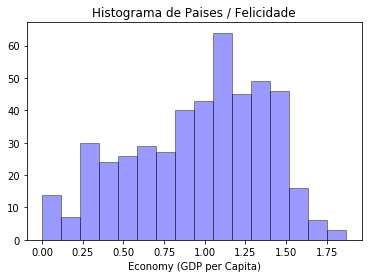

In [40]:
sns.distplot(happy_c['Economy (GDP per Capita)'], hist=True, kde=False, 
             bins = int(160/10), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Histograma de Paises / Felicidade')
# plt.xlabel('')
# plt.ylabel('')

Text(0.5, 1.0, 'Histograma de Paises / Felicidade')

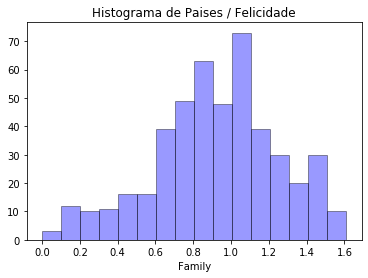

In [41]:
sns.distplot(happy_c['Family'], hist=True, kde=False, 
             bins = int(160/10), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Histograma de Paises / Felicidade')
# plt.xlabel('')
# plt.ylabel('')

Text(0.5, 1.0, 'Histograma de Paises / Felicidade')

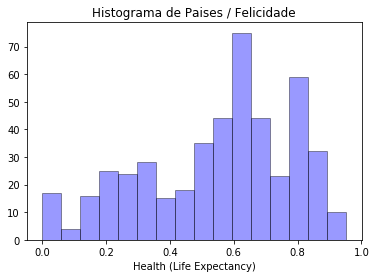

In [42]:
sns.distplot(happy_c['Health (Life Expectancy)'], hist=True, kde=False, 
             bins = int(160/10), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Histograma de Paises / Felicidade')
# plt.xlabel('')
# plt.ylabel('')

Text(0.5, 1.0, 'Histograma de Paises / Felicidade')

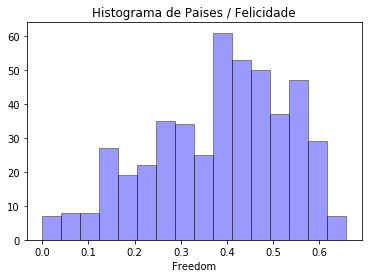

In [43]:
sns.distplot(happy_c['Freedom'], hist=True, kde=False, 
             bins = int(160/10), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Histograma de Paises / Felicidade')
# plt.xlabel('')
# plt.ylabel('')

Text(0.5, 1.0, 'Histograma de Paises / Felicidade')

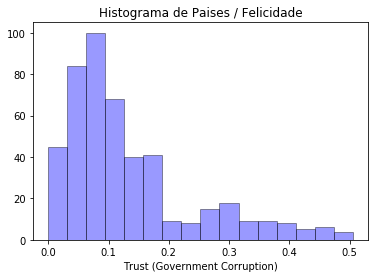

In [44]:
sns.distplot(happy_c['Trust (Government Corruption)'], hist=True, kde=False, 
             bins = int(160/10), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Histograma de Paises / Felicidade')
# plt.xlabel('')
# plt.ylabel('')

Text(0.5, 1.0, 'Histograma de Paises / Felicidade')

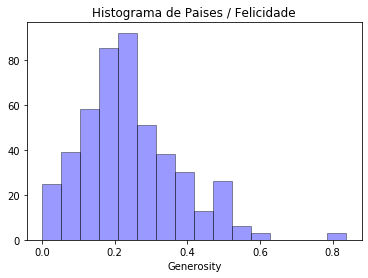

In [45]:
sns.distplot(happy_c['Generosity'], hist=True, kde=False, 
             bins = int(160/10), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Histograma de Paises / Felicidade')
# plt.xlabel('')
# plt.ylabel('')

Text(0.5, 1.0, 'Histograma de Paises / Felicidade')

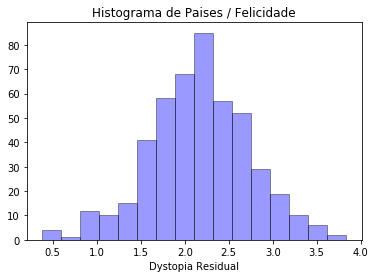

In [46]:
sns.distplot(happy_c['Dystopia Residual'], hist=True, kde=False, 
             bins = int(160/10), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Histograma de Paises / Felicidade')
# plt.xlabel('')
# plt.ylabel('')

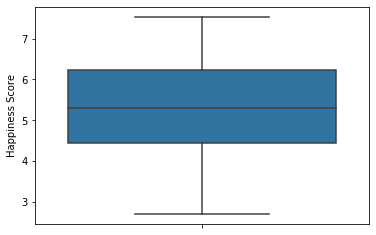

In [62]:
sns.boxplot(y=happy_c['Happiness Score'], 
            orient = 'v')

In [49]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(12,7))
    # Calculate the percentage of target=1 per category value
    cat_perc = happy15[[f, 'target']].groupby([f],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    # Bar plot
    # Order the bars descending on target mean
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show();